<br><font color = black size=6>Black Scholes Model</font> 

---


$ Contents $

- Assumptions of Black Scholes

- Non-dividend paying stock formula and  Python implementation

- Parameter effects on option values

- Dividend paying stock implementation

- OOP implementation. 

__Black-Scholes Assumptions__

There are a number of important assumptions to consider when viewing the formulae below. 

 

1) Interest rate is known and constant through time. 

2) The stock follows a random walk in continuous time, the variance of the stock price paths follow a log-normal distribution. 

3) Volatility is constant 

4) Stock pays no dividends (can be modified to include them however)

5) The option can only be exercised at expiration i.e. it is a European type option.

6) No transaction costs i.e. fees on shorting selling etc. 

7) Fractional trading is possible i.e. we can buy/sell 0.x of any given stock. 

__Black Scholes Formula for Non Dividend Paying Stock__


$$ Call = S_0N(d_1) - N(d_2)Ke^{rT} $$

$$ Put = N(-d_2)Ke^{rT} - N(-d_1)S_0 $$

$ d_1 = \frac {ln(\frac{S}{K}) + \left( r + \frac {\sigma ^2 }{2} \right)T} {\sigma \sqrt T} $

$ d_2 = d_1 - \sigma \sqrt T $


S : current asset price

K: strike price of the option

r: risk free rate 

T : time until option expiration 

σ: annualized volatility of the asset's returns 

 

N(x): is the cumulative distribution function for a standard normal distribution shown below.

$$ N(x) = \int_{-\infty}^{x} \frac {e^{x^2/2}}{\sqrt{2\pi}} $$

In [1]:
import numpy as np
from scipy.stats import norm

N = norm.cdf

def BS_CALL(S, K, T, r, sigma):
    d1 = (np.log(S/K) + (r + sigma**2/2)*T) / (sigma*np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)
    return S * N(d1) - K * np.exp(-r*T)* N(d2)

def BS_PUT(S, K, T, r, sigma):
    d1 = (np.log(S/K) + (r + sigma**2/2)*T) / (sigma*np.sqrt(T))
    d2 = d1 - sigma* np.sqrt(T)
    return K*np.exp(-r*T)*N(-d2) - S*N(-d1)

__Effect on Option value__

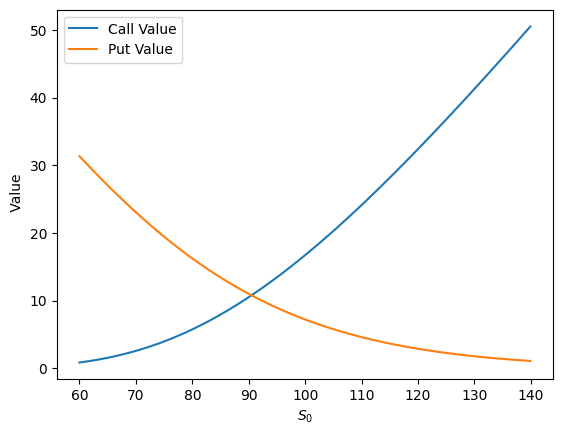

In [3]:
import matplotlib.pyplot as plt

K = 100
r = 0.1
T = 1
sigma = 0.3

S = np.arange(60,140,0.1)

calls = [BS_CALL(s, K, T, r, sigma) for s in S]
puts = [BS_PUT(s, K, T, r, sigma) for s in S]
plt.plot(S, calls, label='Call Value')
plt.plot(S, puts, label='Put Value')
plt.xlabel('$S_0$')
plt.ylabel(' Value')
plt.legend()

$ \sigma $ __Effect on Black-Scholes Value__

As we would expect, when we hold the other variables constant, and increase the volatility parameter both calls and puts increase in value, in what appears to be a linear fashion as shown below.

To understand why the calls value seems to be strictly greater than the put with respect to volatility, change the interest rate 
r
 to 0 and notice that the curve coincide exactly. Rather than making plots for the effect on interest rates, we can deduce from this that an increase in interest rates increases the value of calls and decreases the value of puts. 

<>:11: SyntaxWarning: invalid escape sequence '\s'
<>:11: SyntaxWarning: invalid escape sequence '\s'
C:\Users\manu_\AppData\Local\Temp\ipykernel_15912\1531360080.py:11: SyntaxWarning: invalid escape sequence '\s'
  plt.xlabel('$\sigma$')


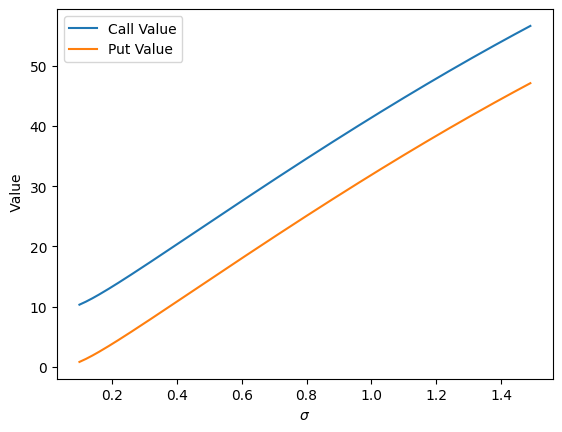

In [4]:
K = 100
r = 0.1
T = 1
Sigmas = np.arange(0.1, 1.5, 0.01)
S = 100

calls = [BS_CALL(S, K, T, r, sig) for sig in Sigmas]
puts = [BS_PUT(S, K, T, r, sig) for sig in Sigmas]
plt.plot(Sigmas, calls, label='Call Value')
plt.plot(Sigmas, puts, label='Put Value')
plt.xlabel('$\sigma$')
plt.ylabel(' Value')
plt.legend()

__Effect of Time on Black-Scholes Price__

As we increase time we increase the uncertainty regarding the future price. Since uncertainty is to the options holder benefit, the price of the option increases with time. Again try setting the interest rate to zero to observe that the difference between puts and calls is eliminated. 

C:\Users\manu_\AppData\Local\Temp\ipykernel_15912\2862210581.py:7: RuntimeWarning: invalid value encountered in scalar divide
  d1 = (np.log(S/K) + (r + sigma**2/2)*T) / (sigma*np.sqrt(T))
C:\Users\manu_\AppData\Local\Temp\ipykernel_15912\2862210581.py:12: RuntimeWarning: invalid value encountered in scalar divide
  d1 = (np.log(S/K) + (r + sigma**2/2)*T) / (sigma*np.sqrt(T))


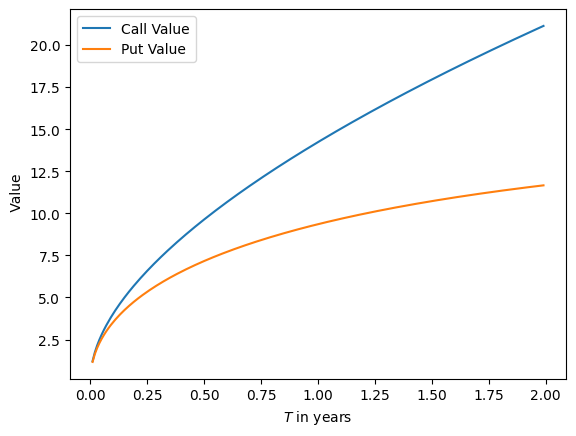

In [5]:
K = 100
r = 0.05
T = np.arange(0, 2, 0.01)
sigma = 0.3
S = 100

calls = [BS_CALL(S, K, t, r, sigma) for t in T]
puts = [BS_PUT(S, K, t, r, sigma) for t in T]
plt.plot(T, calls, label='Call Value')
plt.plot(T, puts, label='Put Value')
plt.xlabel('$T$ in years')
plt.ylabel(' Value')
plt.legend()